In [2]:
from trajectree.sequence.swap import perform_swapping_simulation
# import trajectree

import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Set simulation params
trunc = 2
N = trunc+1
error_tolerance = 1e-7

params = {
    "PA_det_loss": 0.04,
    "BSM_det_loss_1": 0.04, #  0.045,
    "BSM_det_loss_2": 0.04, # 0.135,
    "BSM_dark_counts_1": 1,
    "BSM_dark_counts_2": 1,
    "alpha_list": np.array([np.pi/2]),
    "delta_list": np.array([np.pi/2]),
    "channel_loss": 0,
    "chi": 0.24,
    "BSM_meas": {0:(2,3), 1:(6,7)},

    "if_analyze_entanglement": True,
    "calc_fidelity": False,
}

num_modes = 8
# Create vacuum state
 
# idler_angles = np.linspace(0, np.pi, 1)
# signal_angles = np.linspace(0, 4*np.pi, 30)

num_simulations = 150
visibilities = []

cache_sizes = [2]

for i in [3e-5]: # np.linspace(0.1, 0.5, 5):
    prob_same_phase = 0
    prob_diff_phase = 0

    # params['chi'] = i
    params["BSM_dark_counts_1"] = 1+i
    params["BSM_dark_counts_2"] = 1+i

    params["alpha_list"] = np.array([np.pi/2])

    fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
    print(probabilities)
    prob_same_phase += np.mean(probabilities)

    params["alpha_list"] = np.array([3*np.pi/2])

    fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
    print(probabilities)
    prob_diff_phase += np.mean(probabilities)

    visibilities.append((prob_same_phase - prob_diff_phase) / (prob_same_phase + prob_diff_phase))
# params["BSM_meas"] = {1:(2,3), 0:(6,7)}

# fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
# prob_diff_phase += np.mean(probabilities)

# params["alpha_list"] = np.array([np.pi/2])

# fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
# prob_same_phase += np.mean(probabilities)

/home/anshs/.venv/lib/python3.12/site-packages/trajectree/fock_optics/measurement.py:84: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.


num pa quantum channels: 6
trajectory_probs [1.]
trajectory_probs [1.]
trajectory_probs [8.95935943e-01 4.79552271e-02 2.64759258e-03 4.79552551e-02
 2.56677934e-03 1.41687568e-04 2.64760673e-03 1.41660455e-04
 7.78968752e-06]
trajectory_probs [8.03097910e-01 4.27825011e-02 2.36734307e-03 4.27825291e-02
 2.27901224e-03 1.26085000e-04 2.36733949e-03 1.26001133e-04
 7.16336734e-06]
trajectory_probs [8.03049619e-01 2.41438618e-05 7.21100918e-10 2.41438619e-05
 7.25890468e-10 2.16800567e-14 7.21100914e-10 2.16800564e-14
 6.47514807e-19]
trajectory_probs [8.03001331e-01 2.41424156e-05 7.21057563e-10 2.41424157e-05
 7.25847164e-10 2.16787580e-14 7.21057566e-10 2.16787580e-14
 6.47475880e-19]
trajectory_probs [4.27799563e-02 1.28618874e-06 3.84143953e-11 1.28645600e-06
 3.86775849e-11 1.15517707e-15 3.84065636e-11 1.15470161e-15
 3.44872970e-20]
trajectory_probs [4.27773809e-02 1.28611149e-06 3.84120867e-11 1.28920017e-06
 3.87600906e-11 1.15764148e-15 3.83198211e-11 1.15209396e-15
 3.4409405

/home/anshs/.venv/lib/python3.12/site-packages/trajectree/fock_optics/measurement.py:84: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.


num pa quantum channels: 6
trajectory_probs [1.]
trajectory_probs [1.]
trajectory_probs [8.95935943e-01 4.79552271e-02 2.64759258e-03 4.79552551e-02
 2.56677934e-03 1.41687568e-04 2.64760673e-03 1.41660455e-04
 7.78968752e-06]
trajectory_probs [8.03097910e-01 4.27825011e-02 2.36734307e-03 4.27825291e-02
 2.27901224e-03 1.26085000e-04 2.36733949e-03 1.26001133e-04
 7.16336734e-06]
trajectory_probs [8.03049619e-01 2.41438618e-05 7.21100918e-10 2.41438619e-05
 7.25890468e-10 2.16800567e-14 7.21100914e-10 2.16800564e-14
 6.47514807e-19]
trajectory_probs [8.03001331e-01 2.41424156e-05 7.21057563e-10 2.41424157e-05
 7.25847164e-10 2.16787580e-14 7.21057566e-10 2.16787580e-14
 6.47475880e-19]
trajectory_probs [4.27799563e-02 1.28618874e-06 3.84143953e-11 1.28645600e-06
 3.86775849e-11 1.15517707e-15 3.84065636e-11 1.15470161e-15
 3.44872970e-20]
trajectory_probs [4.27773809e-02 1.28611149e-06 3.84120867e-11 1.28920017e-06
 3.87600906e-11 1.15764148e-15 3.83198211e-11 1.15209396e-15
 3.4409405

[np.complex128(0.9684273148012363+4.494443311777393e-20j)]


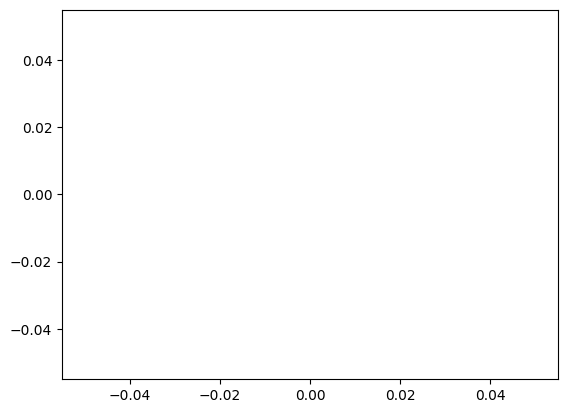

In [4]:
plt.plot(visibilities[1:])
print(visibilities)

In [4]:
(prob_same_phase - prob_diff_phase) / (prob_same_phase + prob_diff_phase)

np.complex128(0.9758537297292986+2.3090187799573835e-19j)